In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import numpy as np

In [3]:
G = nx.Graph()

In [4]:
# read the data file and convert it to a dictionary
# dictionary = {testcase ID (int): {"testcase": testcase name, "exec_line": list of executed lines}}
D = dict()
key_count = 0
previous_test_case = ''
with open('dataset/assertj-core1_2013.txt') as f:
    for line in f:
        l_line = line.rstrip().split("\t")
        if previous_test_case != l_line[1]:
            previous_test_case = l_line[1]
            key_count += 1
        if key_count in D:
            D[key_count]["exec_line"].append(l_line[2]+l_line[3])
        else:
            D[key_count] = {"testcase": l_line[1], "exec_line":[l_line[2]+l_line[3]]}



dict_items([((1, 2), 26), ((1, 3), 62), ((1, 4), 62), ((1, 5), 12), ((1, 6), 16), ((1, 7), 12), ((1, 9), 16), ((1, 10), 19), ((1, 11), 16), ((1, 12), 15), ((1, 13), 12), ((1, 14), 17), ((1, 15), 12), ((1, 16), 16), ((1, 17), 15), ((1, 18), 14), ((1, 19), 27), ((1, 20), 26), ((1, 21), 12), ((1, 22), 10), ((1, 23), 8), ((2, 3), 25), ((2, 4), 25), ((2, 5), 26), ((2, 6), 25), ((2, 7), 25), ((2, 9), 26), ((2, 10), 10), ((2, 11), 13), ((2, 12), 12), ((2, 13), 26), ((2, 14), 13), ((2, 15), 12), ((2, 16), 12), ((2, 17), 12), ((2, 18), 13), ((2, 19), 10), ((2, 20), 10), ((2, 21), 12), ((2, 22), 10), ((2, 23), 5), ((3, 4), 62), ((3, 5), 12), ((3, 6), 15), ((3, 7), 12), ((3, 9), 16), ((3, 10), 19), ((3, 11), 15), ((3, 12), 15), ((3, 13), 12), ((3, 14), 16), ((3, 15), 12), ((3, 16), 16), ((3, 17), 15), ((3, 18), 12), ((3, 19), 26), ((3, 20), 26), ((3, 21), 12), ((3, 22), 10), ((3, 23), 8), ((4, 5), 12), ((4, 6), 15), ((4, 7), 12), ((4, 9), 16), ((4, 10), 19), ((4, 11), 15), ((4, 12), 15), ((4, 13)

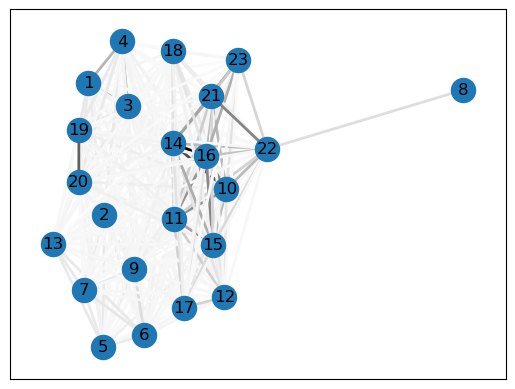

In [8]:
# Create a graph
# networkx's document is refered.
# https://networkx.org/documentation/stable/tutorial.html

# add nodes
for i in D:
    # print(i)
    # print(D[i]["testcase"])
    G.add_node(i)

# add weighted edge: the number of common executed lines is the weight of edge.
for i in range(1, len(D)+1):
    for j in range(i+1, len(D)+1):
        weight = len(set(D[i]["exec_line"]) & set(D[j]["exec_line"]))
        if weight != 0:
            G.add_weighted_edges_from([(i,j,weight)])

edges = G.edges(data=True)
weight_set = ()

# draw the graph with colored edges according to the weight.
# the code "edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())"
# refers to : https://www.tutorialspoint.com/colouring-the-edges-by-weight-in-networkx-matplotlib
print(nx.get_edge_attributes(G, 'weight').items())
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw_networkx(G,width=2, edge_color=weights, edge_cmap=plt.cm.Greys)
               
               
    

In [16]:
# Create Embedding
# https://github.com/eliorc/node2vec
# for destination in G.neighbors(1):
#     print(destination)
#     if G[1][destination].get("weight"):
#         weight = G[1][destination].get("weight", 1)
#         print("weight between 1 and destination is:", weight)
        
node2vec = Node2Vec(G, dimensions=8)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

embeddings = np.array([model.wv[x] for x in G.nodes])

# reduce the dimension using t-SNE
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

# visualise the embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.46it/s]


TypeError: Word2Vec.__init__() got an unexpected keyword argument 'size'

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py